In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [421]:
train=pd.read_csv(r"C:\Users\Abhinav\Desktop\Kaggle\Titanic\train.csv")

In [422]:
train.shape

(891, 12)

In [423]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [424]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 318.5 KB


In [425]:
train=train.drop(['Cabin'],1)

In [426]:
train=train.drop(['Ticket'],1)

In [485]:
train.Age=train.Age.fillna(train.Age.median())
train=train.dropna()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,SexLabel,family_score,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,S,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,S,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,S,0,3,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C,1,0,1,0,0


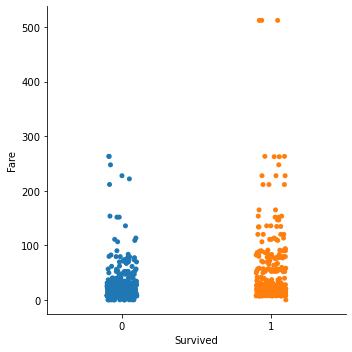

In [486]:
sns.catplot(x='Survived',y='Fare',data=train)

In [487]:
print('median = ',train.Fare.median())
print('mean = ',train.Fare.mean())
print('mod = ', train.Fare.mode())

median =  14.4542
mean =  32.09668087739029
mod =  0    8.05
dtype: float64


In [488]:
train[train.Fare >32.2042079685746].Survived.value_counts()

1    124
0     85
Name: Survived, dtype: int64

In [489]:
train[train.Fare <= 32.2042079685746].Survived.value_counts()

0    464
1    216
Name: Survived, dtype: int64

In [490]:
train[train.Fare >14.4542].Survived.value_counts()

1    228
0    214
Name: Survived, dtype: int64

In [491]:
train[train.Fare <= 14.4542].Survived.value_counts()

0    335
1    112
Name: Survived, dtype: int64

In [492]:
print(train.groupby(['Survived','Pclass']))

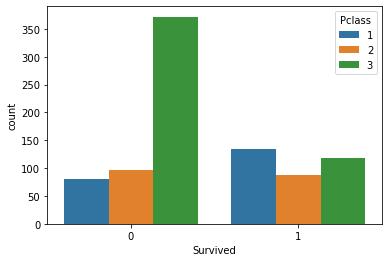

In [493]:
sns.countplot(x='Survived',data=train,hue='Pclass')

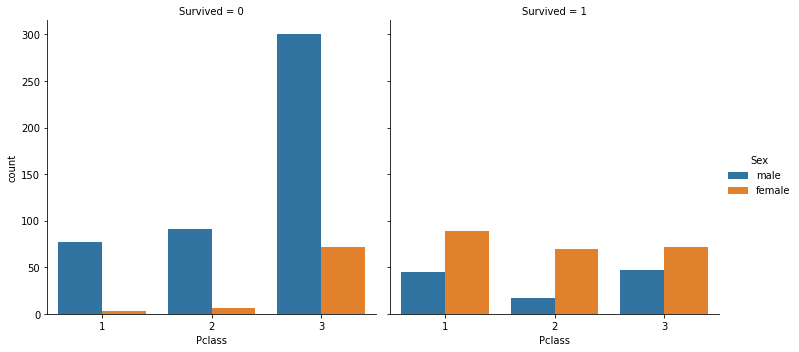

In [494]:
sns.catplot(x='Pclass',data=train,hue='Sex',kind='count',col='Survived')

In [495]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,SexLabel,family_score,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,S,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,S,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,S,0,3,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C,1,0,1,0,0


In [496]:
le=LabelEncoder()
train['SexLabel']=le.fit_transform(train.Sex)

In [497]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,SexLabel,family_score,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,S,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,S,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,S,1,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,S,0,3,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C,1,0,1,0,0


In [498]:
train=train.dropna()

In [499]:
train.shape

(889, 13)

In [500]:
train.Parch.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Parch'

In [501]:
train['family_score']=train.SibSp+train.Parch

AttributeError: 'DataFrame' object has no attribute 'SibSp'

In [502]:
train.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [503]:
train=train.drop(['SibSp','Parch'],1)

KeyError: "['SibSp' 'Parch'] not found in axis"

In [504]:
train=pd.concat([train,pd.get_dummies(train.Embarked)],axis =1)

In [505]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,SexLabel,family_score,C,Q,S,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,7.2500,S,1,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,71.2833,C,0,1,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250,S,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,53.1000,S,0,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,8.0500,S,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,13.0000,S,1,0,0,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,30.0000,S,0,0,0,0,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,23.4500,S,0,3,0,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,30.0000,C,1,0,1,0,0,1,0,0


In [506]:
print('Mean Fare Given by passengers who survived - ',train[train['Survived']==1].Fare.mean())
print('Mean Fare Given by passengers who coudn"t survive - ', train[train['Survived']==0].Fare.mean())
print('Median Fare Given by passengers who survived - ',train[train['Survived']==1].Fare.median())
print('Median Fare Given by passengers who coudn"t survive - ', train[train['Survived']==0].Fare.median())

Mean Fare Given by passengers who survived -  48.209498235294106
Mean Fare Given by passengers who coudn"t survive -  22.117886885245877
Median Fare Given by passengers who survived -  26.0
Median Fare Given by passengers who coudn"t survive -  10.5


In [518]:
X= np.asanyarray(train[['Pclass','Age','C','Q','S','SexLabel','family_score']])
Y= np.asanyarray(train['Survived'])

In [508]:
X

array([[ 3.        , 22.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        , 29.69911765,  0.        , ...,  1.        ,
         0.        ,  3.        ],
       [ 1.        , 26.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [509]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [510]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [519]:
X

array([[ 3.        , 22.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 26.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        , 29.69911765,  0.        , ...,  1.        ,
         0.        ,  3.        ],
       [ 1.        , 26.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        , 32.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [512]:
test=pd.read_csv(r"C:\Users\Abhinav\Desktop\Kaggle\Titanic\test.csv")

In [513]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [514]:
test['family_score']=test.SibSp+test.Parch

In [515]:
test['SexLabel']=le.fit_transform(test.Sex)
test=pd.concat([test,pd.get_dummies(test.Embarked)],axis=1)

In [516]:
test=test.drop(['Ticket','Cabin'],1)

In [517]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family_score,SexLabel,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,0,1,0,0,1


In [520]:
test.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family_score,SexLabel,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,S,2,0,0,0,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,Q,1,0,0,1,0
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,S,0,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,0,1,0,0


In [521]:
test.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family_score,SexLabel,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,S,2,0,0,0,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,Q,1,0,0,1,0
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,S,0,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,0,1,0,0


In [522]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           332 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Fare          417 non-null    float64
 8   Embarked      418 non-null    object 
 9   family_score  418 non-null    int64  
 10  SexLabel      418 non-null    int32  
 11  C             418 non-null    uint8  
 12  Q             418 non-null    uint8  
 13  S             418 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), object(3), uint8(3)
memory usage: 110.8 KB


In [523]:
test['Age']=test['Age'].fillna(test['Age'].median())

In [524]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [525]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family_score,SexLabel,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S,0,1,0,0,1


In [526]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           418 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Fare          418 non-null    float64
 8   Embarked      418 non-null    object 
 9   family_score  418 non-null    int64  
 10  SexLabel      418 non-null    int32  
 11  C             418 non-null    uint8  
 12  Q             418 non-null    uint8  
 13  S             418 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), object(3), uint8(3)
memory usage: 110.8 KB


In [527]:
X_test= np.asanyarray(test[['Pclass','Age','C','Q','S','SexLabel','family_score']])
# X_test=ss.transform(X_test)
X_test

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  1. ,  1. ,  0. ],
       [ 3. , 27. ,  0. , ...,  1. ,  1. ,  0. ],
       [ 3. , 27. ,  1. , ...,  0. ,  1. ,  2. ]])

# ML
## Train

In [528]:
from sklearn.linear_model import LogisticRegression

In [529]:
reg=LogisticRegression(C= 0.1, solver='liblinear')

In [530]:
reg

LogisticRegression(C=0.1, solver='liblinear')

In [531]:
reg.fit(X,Y)

LogisticRegression(C=0.1, solver='liblinear')

In [532]:
Y_test=reg.predict(X_test)

ValueError: X has 7 features per sample; expecting 10

In [533]:
Y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [534]:
Answer=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':Y_test})

In [535]:
Answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [536]:
Answer.to_csv("C:\\Users\\Abhinav\\Desktop\\Kaggle\\Titanic\\Solution.csv",index=False)